In [ ]:
# This notebook is used to test model1
# it loads the model, it loads its weights, it calculate the accuracy and test it against custom images

In [1]:
import sys
import keras
from keras import backend as K
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing import image
import keras.utils as image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import tensorflow as tf

from tensorflow.keras.layers.experimental import preprocessing

2023-10-29 18:55:28.837743: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 18:55:28.880993: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-29 18:55:28.881027: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-29 18:55:28.881070: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-29 18:55:28.888823: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 18:55:28.889563: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [41]:
# parameters
model_path='models/model1.keras'
weights_path='weights/model1-1.bin'

SIZE_X = 224
SIZE_Y = 224

BATCH_SIZE = 4
SEED=1
data_path='/home/agtonybarletta/projects/posture-check-model/data'
label_class_map = {0:'OK', 1:'NOT_OK', 2:'NONE'}


In [3]:
model1 = keras.models.load_model(model_path)

In [4]:
#print(model1.summary())

In [43]:
model1.load_weights(weights_path)
#model1.save_weights(weights_path)

In [44]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory=data_path,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(224, 224),
    color_mode="rgb",
    validation_split=0.2,
    subset="validation",
    seed=1,
    shuffle = True
)
validation_ds

Found 174 files belonging to 3 classes.
Using 34 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [45]:
results = model1.evaluate(validation_ds)

9/9 [==============================] - 1s 54ms/step - loss: 0.5036 - accuracy: 0.9118


In [46]:
print('test loss: ', results[0])
print('test acc: ', results[1])

test loss:  0.5036266446113586
test acc:  0.9117646813392639


In [47]:
from common import getImageFromWebcam
img_name = getImageFromWebcam()

Escape hit, closing...


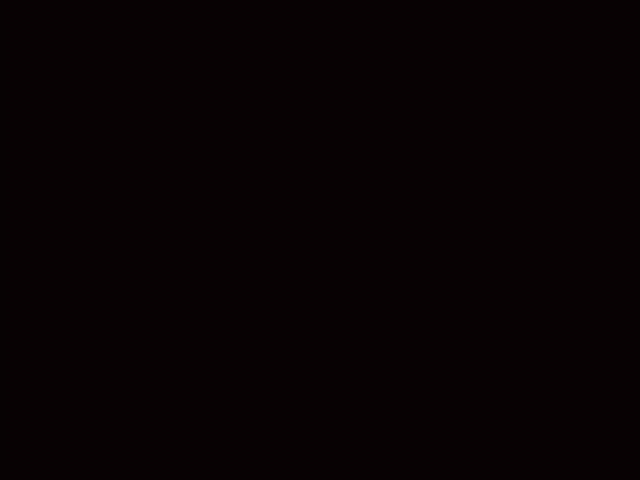

In [48]:
from IPython.display import Image
img_name
Image(filename=img_name)

In [49]:
# TODO move to common.py
import numpy as np
import matplotlib.pyplot as plt
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    #img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()
    return img_tensor



In [50]:
new_image = load_image(img_name)

pred = model1.predict(new_image)
pred

1/1 [==============================] - 0s 43ms/step


array([[7.8716866e-11, 1.8984160e-07, 9.9999976e-01]], dtype=float32)

In [51]:
i_pred = pred.argmax(axis=-1)[0]
i_pred

2

In [52]:
print(label_class_map[i_pred])

NONE
